In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulating interaction data for chapters 22-30
data = {
    'Chapter': [f'Chapter {i}' for i in range(22, 31)],
    'Page Views': np.random.randint(500, 2000, 9),  # Simulated page views
    'Avg Time Spent (min)': np.random.uniform(3, 8, 9),  # Avg time spent on each chapter
    'Bounce Rate (%)': np.random.uniform(40, 70, 9),  # Simulated bounce rates
    'Retention Rate (%)': np.random.uniform(30, 60, 9)  # Retention rate for each chapter
}

# Creating a DataFrame
df = pd.DataFrame(data)
df.set_index('Chapter', inplace=True)

# Displaying the simulated data
df

,Page Views,Avg Time Spent (min),Bounce Rate (%),Retention Rate (%)
Chapter,,,,
Chapter 22,1183,3.320245,69.309306,57.762321
Chapter 23,1457,7.653057,62.270588,56.169077
Chapter 24,1423,3.734857,49.690023,43.720142
Chapter 25,926,4.745723,50.509152,54.085267
Chapter 26,815,4.175456,44.689261,43.006295
Chapter 27,1531,3.951663,49.267591,41.057242
Chapter 28,836,4.625077,54.463594,43.197446
Chapter 29,1510,3.019386,64.812935,36.091589
Chapter 30,1056,3.776874,68.827359,56.339382


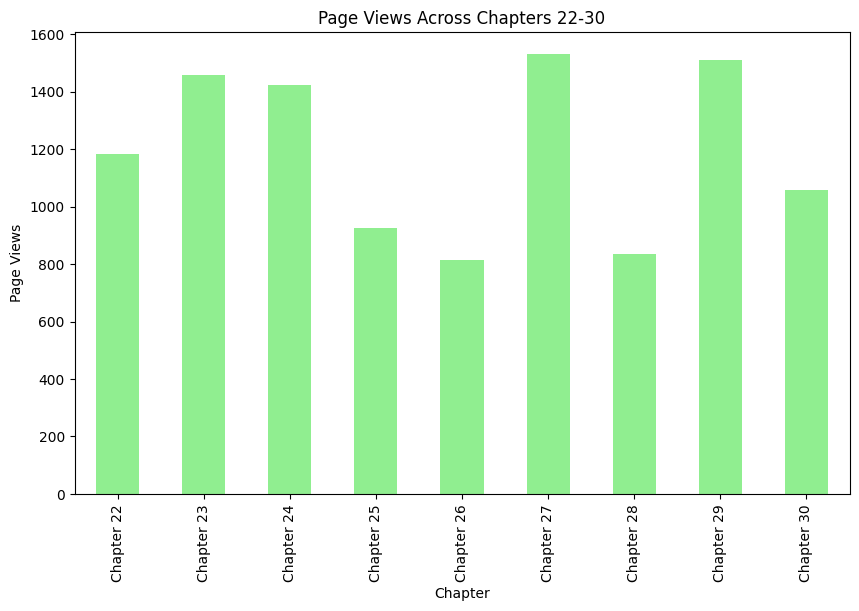

In [3]:
# Bar Graph for Page Views Across Chapters


df['Page Views'].plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Page Views Across Chapters 22-30')
plt.xlabel('Chapter')
plt.ylabel('Page Views')
plt.show()

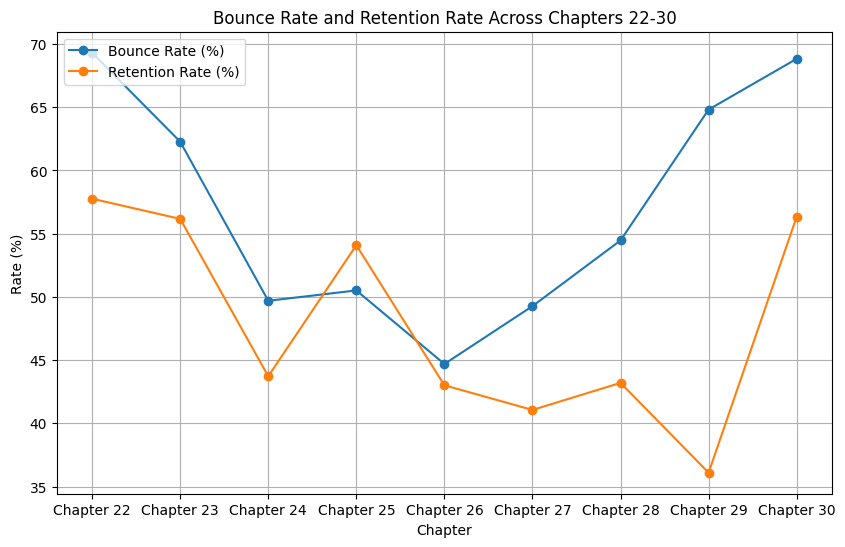

In [4]:
#Line Plot for Bounce Rate and Retention Rate


df[['Bounce Rate (%)', 'Retention Rate (%)']].plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Bounce Rate and Retention Rate Across Chapters 22-30')
plt.xlabel('Chapter')
plt.ylabel('Rate (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [5]:
# Correlation between Avg Time Spent and Retention
correlation = df[['Avg Time Spent (min)', 'Retention Rate (%)']].corr()

print(f"Correlation between Avg Time Spent and Retention Rate: {correlation.loc['Avg Time Spent (min)', 'Retention Rate (%)']:.2f}")


Correlation between Avg Time Spent and Retention Rate: 0.40


 # A/B Testing

    Variation A (Text-heavy):
        Default version with paragraphs of dialogue and description.
    Variation B (More Visuals):
        Replace large portions of text that describe the King Yemma’s appearance with visual representations or comic panels that show him in action.
    Variation C (Interactive):
        Use a clickable panel or hoverable feature where users can learn more about King Yemma’s backstory without disrupting the flow of the main narrative.

In [7]:
from scipy import stats

np.random.seed(42)  # Set seed for reproducibility

In [10]:
# Define chapters and variants
chapters = [f'Chapter {i}' for i in range(22, 31)]
variants = ['Text-Heavy', 'More Visuals', 'Interactive']

# Simulate user data 
data = {
    'Chapter': np.repeat(chapters, 3),  # Repeat each chapter for the 3 variants
    'Variant': variants * len(chapters),
    'Page Views': np.random.randint(500, 1500, len(chapters) * 3),  # Random page views
    'Avg Time Spent (min)': np.random.uniform(3, 8, len(chapters) * 3),  # Random avg time spent
    'Bounce Rate (%)': np.random.uniform(30, 70, len(chapters) * 3),  # Random bounce rate
    'Retention Rate (%)': np.random.uniform(40, 80, len(chapters) * 3)  # Random retention rate
}

# Create DataFrame
df = pd.DataFrame(data)

# Basic Data Overview
print("Data Overview:")
print(df.head(), "\n")


Data Overview:
      Chapter       Variant  Page Views  Avg Time Spent (min)   
0  Chapter 22    Text-Heavy         897              7.714268  \
1  Chapter 22  More Visuals        1370              5.994327   
2  Chapter 22   Interactive        1294              6.473925   
3  Chapter 23    Text-Heavy         892              7.402339   
4  Chapter 23  More Visuals         706              6.121770   

   Bounce Rate (%)  Retention Rate (%)  
0        38.750569           55.952978  
1        52.324080           72.657275  
2        46.153447           71.933805  
3        32.595690           46.028702  
4        40.156617           60.327951   



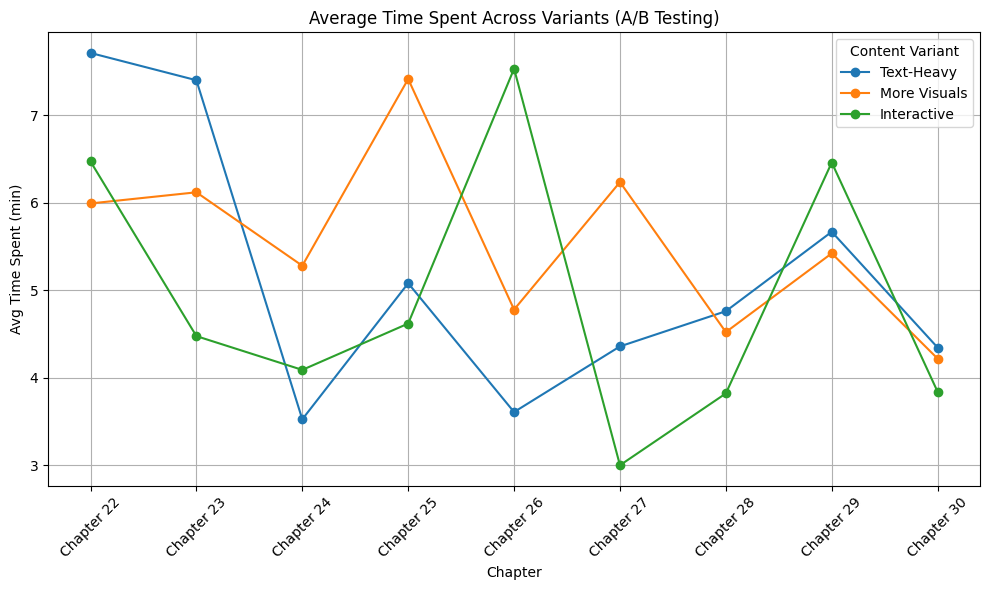

In [13]:
# Plot Avg Time Spent for different variants across chapters
plt.figure(figsize=(10, 6))
for variant in variants:
    subset = df[df['Variant'] == variant]
    plt.plot(subset['Chapter'], subset['Avg Time Spent (min)'], marker='o', label=variant)
    plt.title('Average Time Spent Across Variants (A/B Testing)')
plt.xlabel('Chapter')
plt.ylabel('Avg Time Spent (min)')
plt.legend(title="Content Variant")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Perform independent t-test: Text-Heavy vs Interactive (Avg Time Spent)
text_heavy = df[df['Variant'] == 'Text-Heavy']['Avg Time Spent (min)']
interactive = df[df['Variant'] == 'Interactive']['Avg Time Spent (min)']

# Normality tests
shapiro_text = stats.shapiro(text_heavy)
shapiro_interactive = stats.shapiro(interactive)
print(f"Shapiro-Wilk test for Text-Heavy normality: p-value = {shapiro_text.pvalue:.4f}")
print(f"Shapiro-Wilk test for Interactive normality: p-value = {shapiro_interactive.pvalue:.4f}")

# Levene’s test for variance equality
levene_test = stats.levene(text_heavy, interactive)
print(f"Levene’s test for variance equality: p-value = {levene_test.pvalue:.4f}")

# Perform t-test if normality assumptions are met
if shapiro_text.pvalue > 0.05 and shapiro_interactive.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_stat, p_value = stats.ttest_ind(text_heavy, interactive)
    print(f"\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("There is a statistically significant difference between Text-Heavy and Interactive variants.")
    else:
        print("No statistically significant difference found.")
else:
    print("\nData does not meet normality or variance assumptions for t-test. Consider non-parametric tests.\n")

Shapiro-Wilk test for Text-Heavy normality: p-value = 0.1701
Shapiro-Wilk test for Interactive normality: p-value = 0.2549
Levene’s test for variance equality: p-value = 0.9450

T-statistic: 0.33, P-value: 0.7434
No statistically significant difference found.


C:\Users\juyan\AppData\Local\Temp\ipykernel_12984\2148787964.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subset['Chapter'], rotation=45)


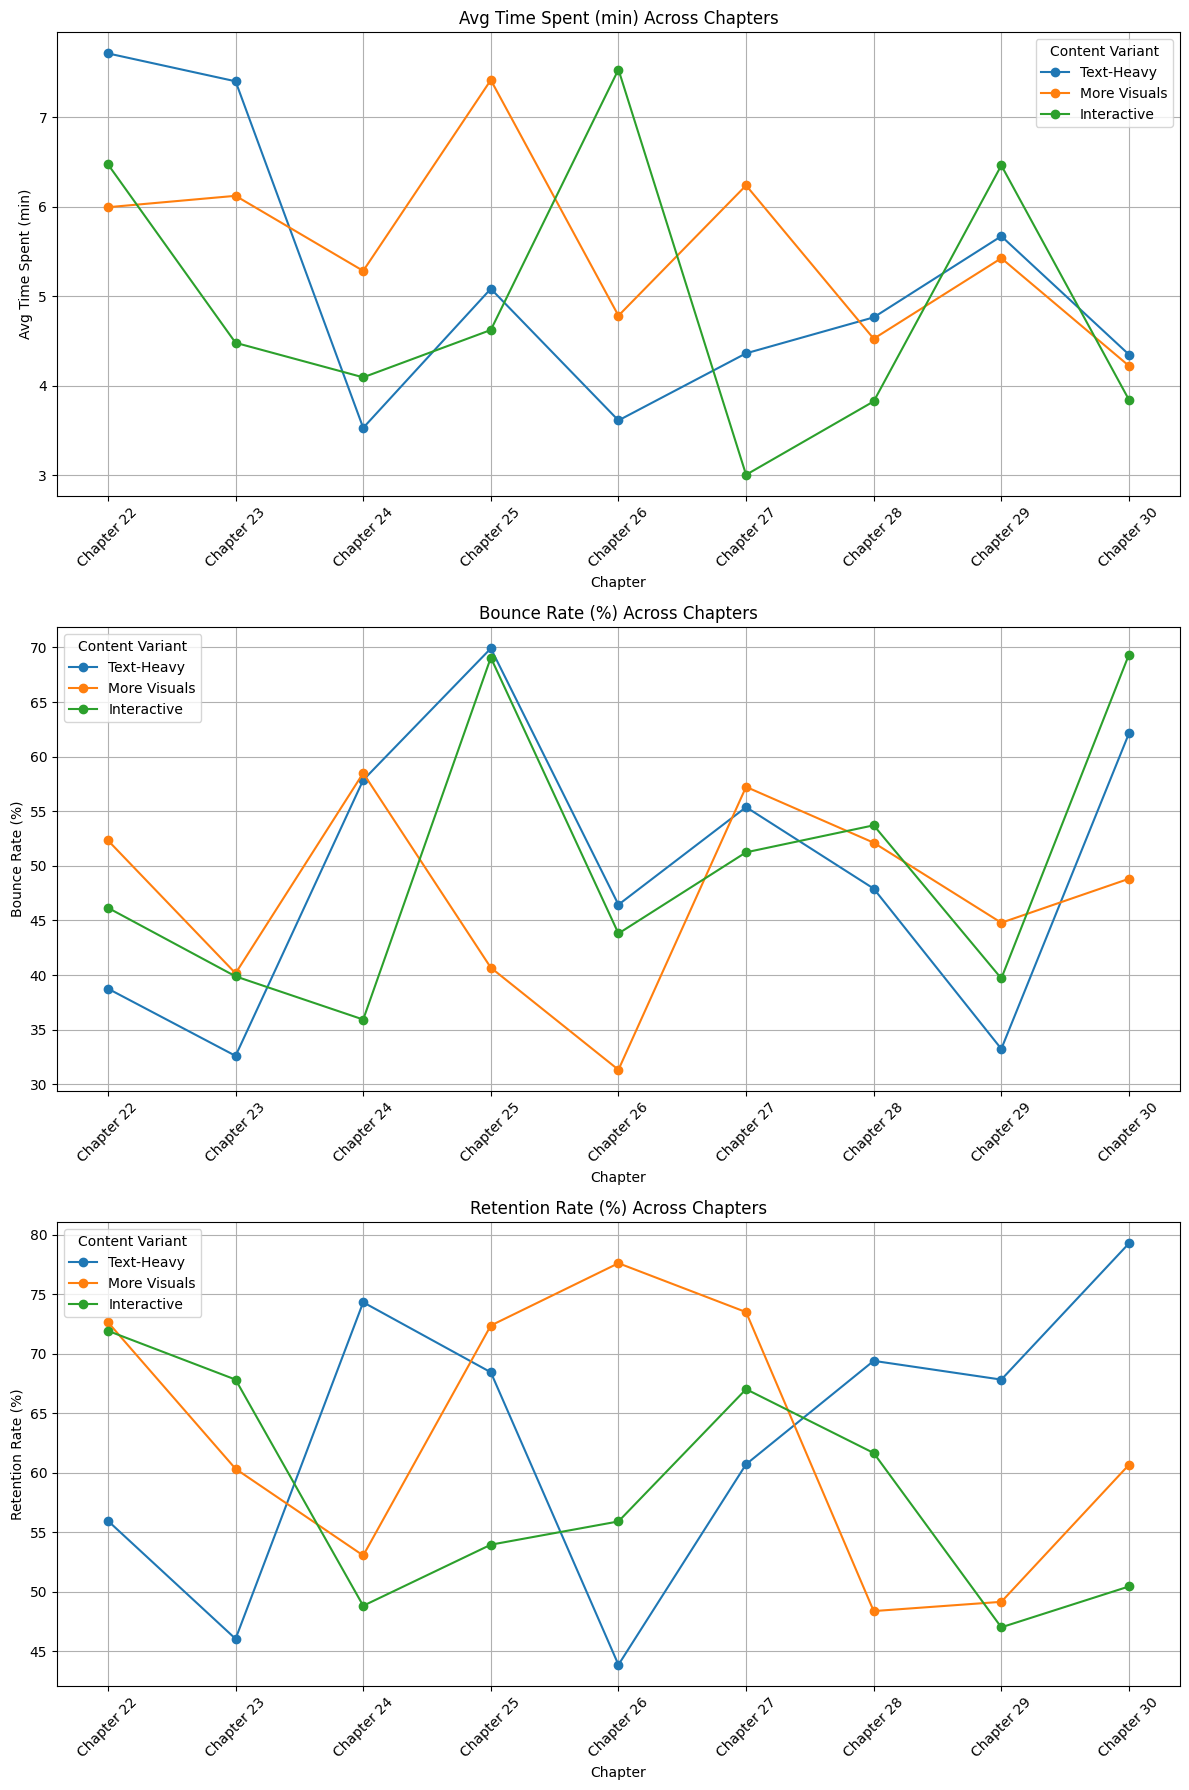

In [16]:

# Create a figure with 3 subplots (one for each metric)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Define the metrics and their labels
metrics = ['Avg Time Spent (min)', 'Bounce Rate (%)', 'Retention Rate (%)']
y_labels = ['Avg Time Spent (min)', 'Bounce Rate (%)', 'Retention Rate (%)']

# Plot each metric on a separate subplot
for i, metric in enumerate(metrics):
    ax = axes[i]  # Select the current axis
    for variant in variants:
        subset = df[df['Variant'] == variant]
        ax.plot(subset['Chapter'], subset[metric], marker='o', label=variant)
    
    ax.set_title(f'{metric} Across Chapters')
    ax.set_xlabel('Chapter')
    ax.set_ylabel(y_labels[i])
    ax.legend(title="Content Variant")
    ax.grid(True)
    ax.set_xticklabels(subset['Chapter'], rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the subplots
plt.show()
